<a href="https://colab.research.google.com/github/SahilR02/ADS-Experiments/blob/main/ADS%20Experiment%203ADS_Exp3_SahilR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ADS Experiment No.3**

**Import Necessary Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('district_apy.csv')
data

,ds_st,DS_1971,ST_1971,year,crop,area,production,yield
0,24 Parganas_West Bengal,24 Parganas,West Bengal,1956,Barley,0.040486,0.014221,0.351264
1,24 Parganas_West Bengal,24 Parganas,West Bengal,1957,Barley,0.040486,0.015640,0.386298
2,24 Parganas_West Bengal,24 Parganas,West Bengal,1958,Barley,0.202429,0.126535,0.625084
3,24 Parganas_West Bengal,24 Parganas,West Bengal,1959,Barley,0.080972,0.032623,0.402893
4,24 Parganas_West Bengal,24 Parganas,West Bengal,1960,Barley,0.040486,0.021948,0.542109
...,...,...,...,...,...,...,...,...
428553,Yavatmal_Maharashtra,Yavatmal,Maharashtra,2004,Wheat,5.100000,5.000000,0.980392
428554,Yavatmal_Maharashtra,Yavatmal,Maharashtra,2005,Wheat,15.900000,15.800000,0.993711
428555,Yavatmal_Maharashtra,Yavatmal,Maharashtra,2006,Wheat,33.100000,37.600000,1.135952
428556,Yavatmal_Maharashtra,Yavatmal,Maharashtra,2007,Wheat,45.600000,82.200000,1.802632


In [ ]:
# DataFrame info
print("\nDataFrame info:")
print(data.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428558 entries, 0 to 428557
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ds_st       428558 non-null  object 
 1   DS_1971     428558 non-null  object 
 2   ST_1971     428558 non-null  object 
 3   year        428558 non-null  int64  
 4   crop        428558 non-null  object 
 5   area        381364 non-null  float64
 6   production  315617 non-null  float64
 7   yield       199381 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 26.2+ MB
None


In [ ]:
missing_values_per_column = data.isna().sum()
print("Number of missing values per column:")
print(missing_values_per_column)

Number of missing values per column:
ds_st              0
DS_1971            0
ST_1971            0
year               0
crop               0
area           47194
production    112941
yield         229177
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer for numerical columns with strategy='median'
num_imputer = SimpleImputer(strategy='most_frequent')

# List of numerical columns
num_cols = ['year', 'area', 'production', 'yield']

# Apply the imputers to fill missing values
data[num_cols] = num_imputer.fit_transform(data[num_cols])
data.head()

,ds_st,DS_1971,ST_1971,year,crop,area,production,yield
0,24 Parganas_West Bengal,24 Parganas,West Bengal,1956.0,Barley,0.040486,0.014221,0.351264
1,24 Parganas_West Bengal,24 Parganas,West Bengal,1957.0,Barley,0.040486,0.015640,0.386298
2,24 Parganas_West Bengal,24 Parganas,West Bengal,1958.0,Barley,0.202429,0.126535,0.625084
3,24 Parganas_West Bengal,24 Parganas,West Bengal,1959.0,Barley,0.080972,0.032623,0.402893
4,24 Parganas_West Bengal,24 Parganas,West Bengal,1960.0,Barley,0.040486,0.021948,0.542109


**Bar Chart**

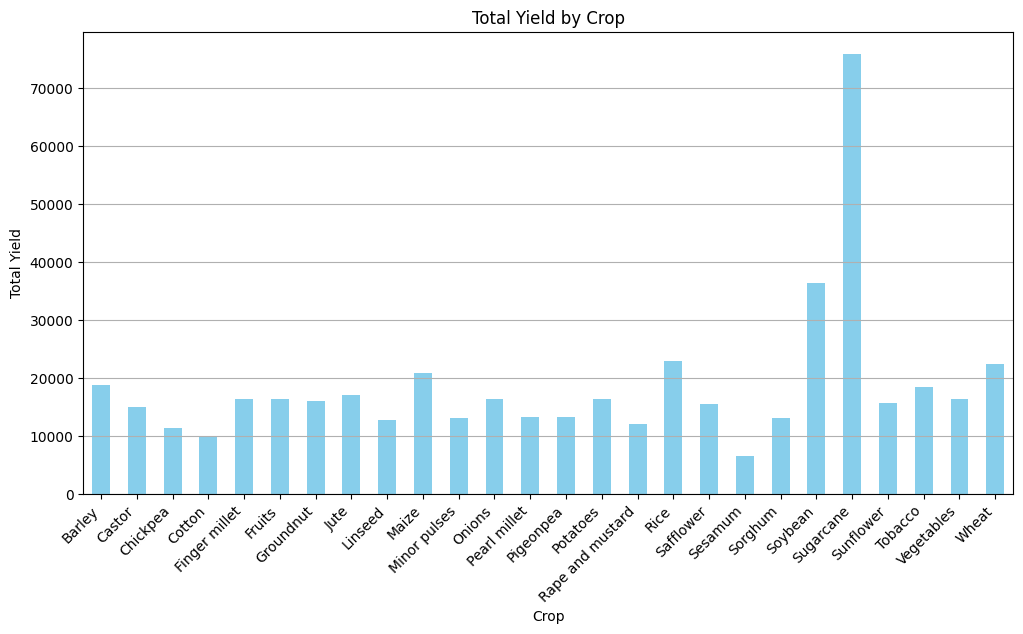

In [ ]:
# Calculate the total yield for each crop
total_yield_per_crop = data.groupby('crop')['yield'].sum()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
total_yield_per_crop.plot(kind='bar', color='skyblue')
plt.title('Total Yield by Crop')
plt.xlabel('Crop')
plt.ylabel('Total Yield')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


**Violin Plot**

<ipython-input-7-c6b2c4f749dc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='ST_1971', y='yield', data=data, palette='husl')


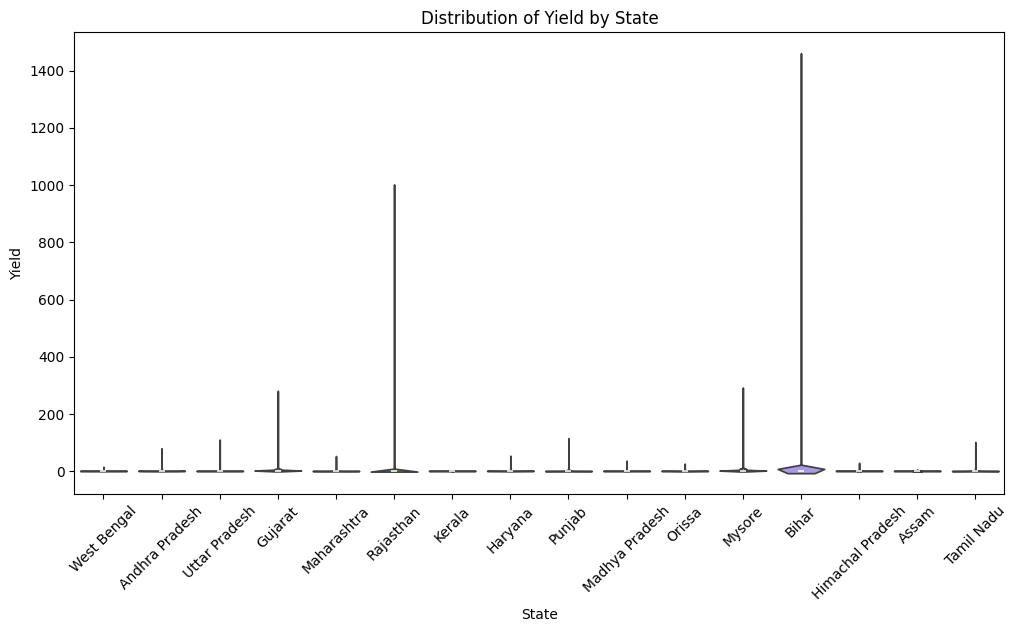

In [ ]:
import seaborn as sns

# Plotting the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='ST_1971', y='yield', data=data, palette='husl')
plt.title('Distribution of Yield by State')
plt.xlabel('State')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.show()


**Line PLot**

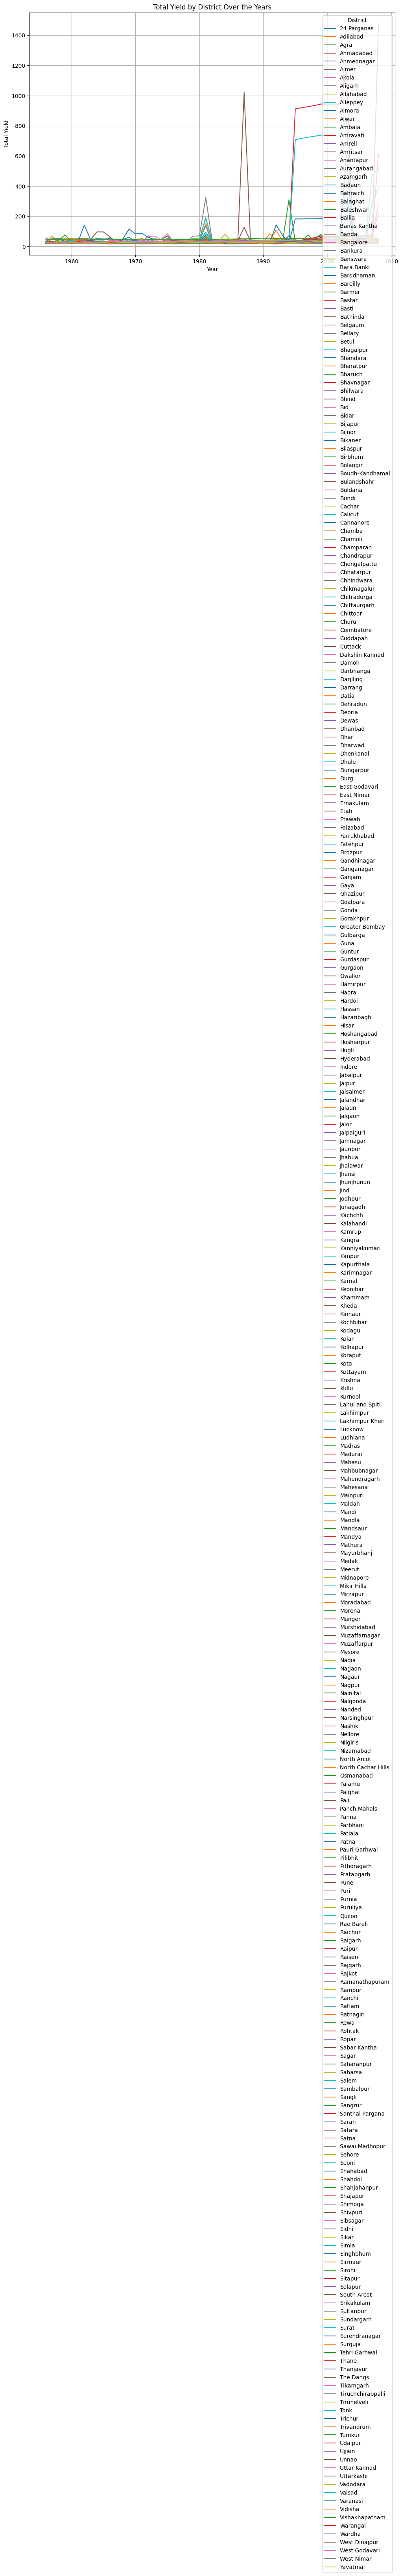

In [ ]:
import matplotlib.pyplot as plt

# Aggregate the data to calculate the total yield for each district in each year
total_yield_per_district_year = data.groupby(['DS_1971', 'year'])['yield'].sum()

# Create a line plot for each district
plt.figure(figsize=(12, 8))

# Iterate over unique districts and plot line plots
for district in total_yield_per_district_year.index.get_level_values('DS_1971').unique():
    district_data = total_yield_per_district_year[district]
    plt.plot(district_data.index, district_data.values, label=district)

plt.title('Total Yield by District Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Yield')
plt.legend(title='District')
plt.grid(True)
plt.show()


**Scatter Plot**

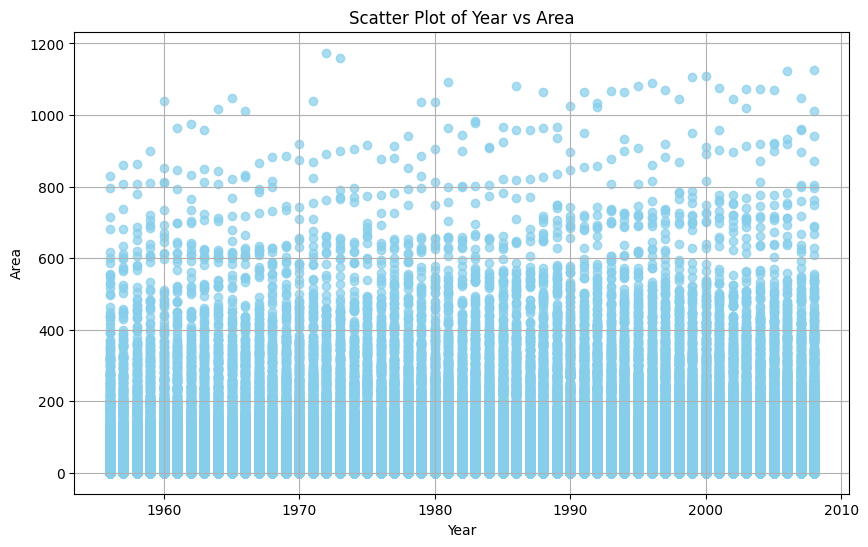

In [ ]:
# Scatter plot for two numerical variables
plt.figure(figsize=(10, 6))
plt.scatter(data['year'], data['area'], color='skyblue', alpha=0.7)
plt.title('Scatter Plot of Year vs Area')
plt.xlabel('Year')
plt.ylabel('Area')
plt.grid(True)
plt.show()


**Heatmap**

<ipython-input-13-8807a4520acc>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


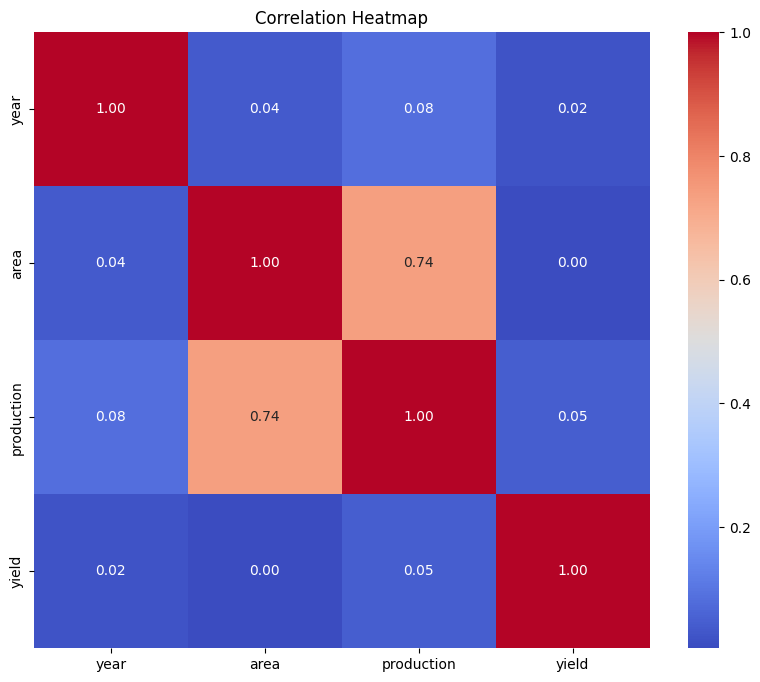

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

**Histogram**

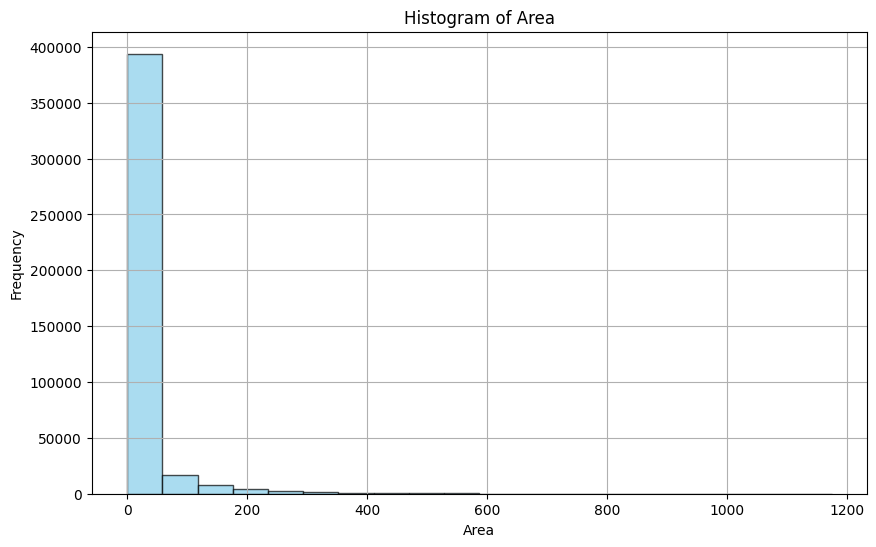

In [ ]:
import matplotlib.pyplot as plt

# Plotting the histogram for the 'area' column
plt.figure(figsize=(10, 6))
plt.hist(data['area'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Pie Chart**

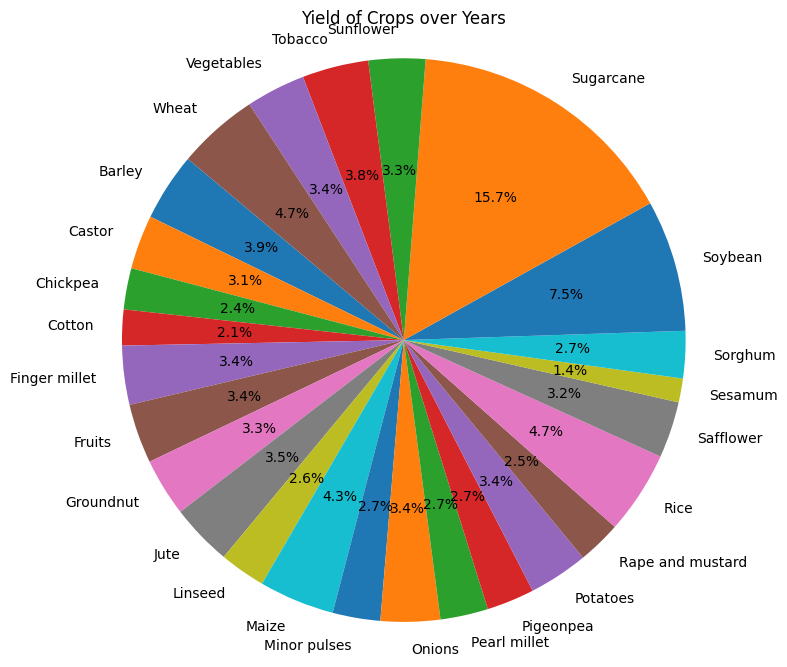

In [ ]:
import matplotlib.pyplot as plt

# Aggregate the data to calculate the total yield for each crop over years
yield_per_crop = data.groupby('crop')['yield'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(yield_per_crop, labels=yield_per_crop.index, autopct='%1.1f%%', startangle=140)
plt.title('Yield of Crops over Years')
plt.axis('equal')
plt.show()
